In [1]:
from lib.BBVisualizations import BBVisualization, PlotsEnum
from lib.BBMetrics import MetricsMTEnum, MetricsTGEnum, MetricsSSIMEnum, MetricsClsEnum


c:\Users\User\Documents\Unibo\NLP\BarneyBot\.env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

## Machine Translation

Machine Translation


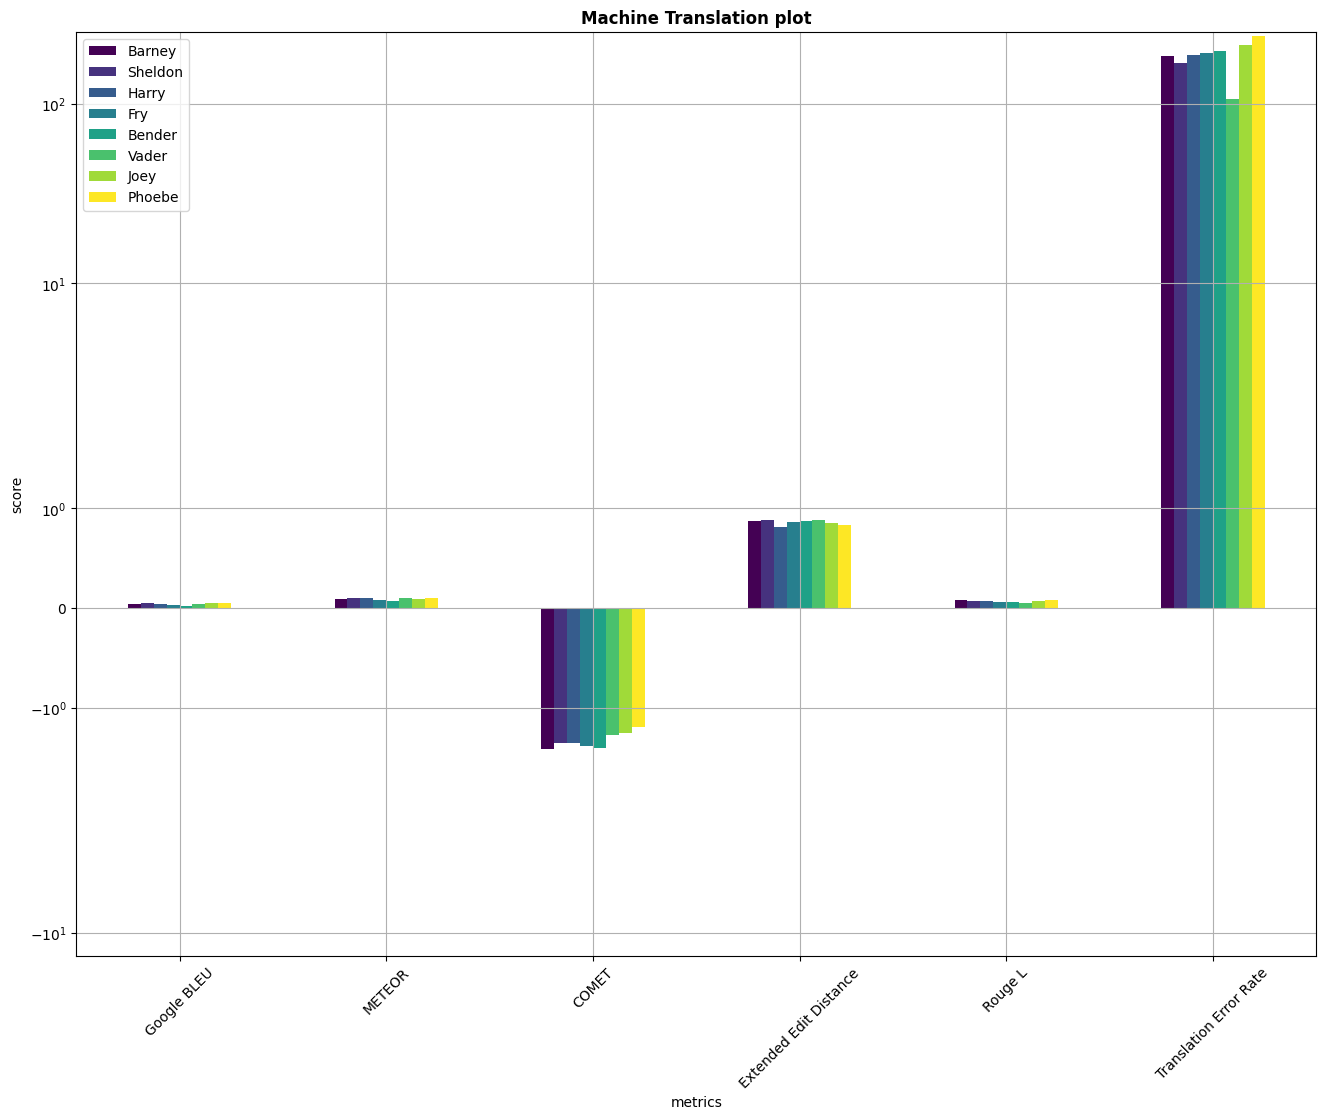

In [2]:
BBVisualization.load_visualization(PlotsEnum.MT.value, commondf=False, debug=False).plot()

In [3]:
mts = MetricsMTEnum.BLEU.tolist().copy()
mts.remove(MetricsMTEnum.COMET.value)
mts

['Google BLEU',
 'METEOR',
 'Extended Edit Distance',
 'Rouge L',
 'Translation Error Rate']

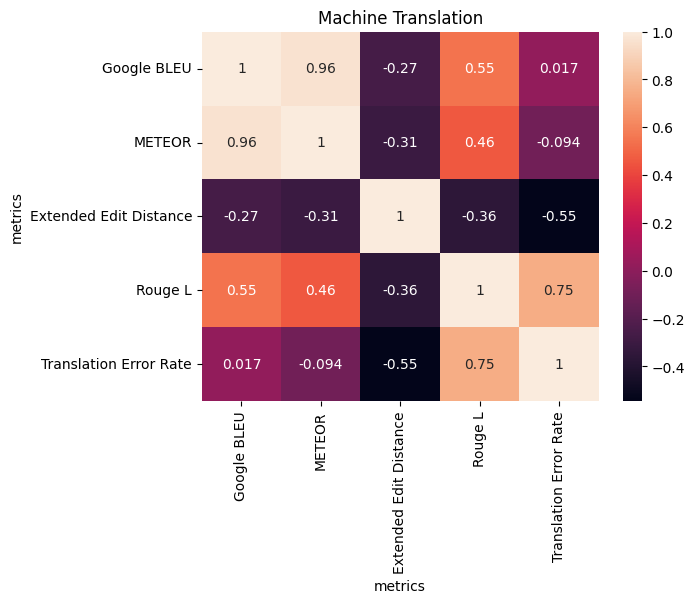

In [4]:
### correlation matrix over metrics
# BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='metrics') 
### correlation matrix over characters removing COMET
# BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='characters')
### correlation matrix over metrics removing COMET
BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=False).corr(correlate='metrics')

Machine Translation


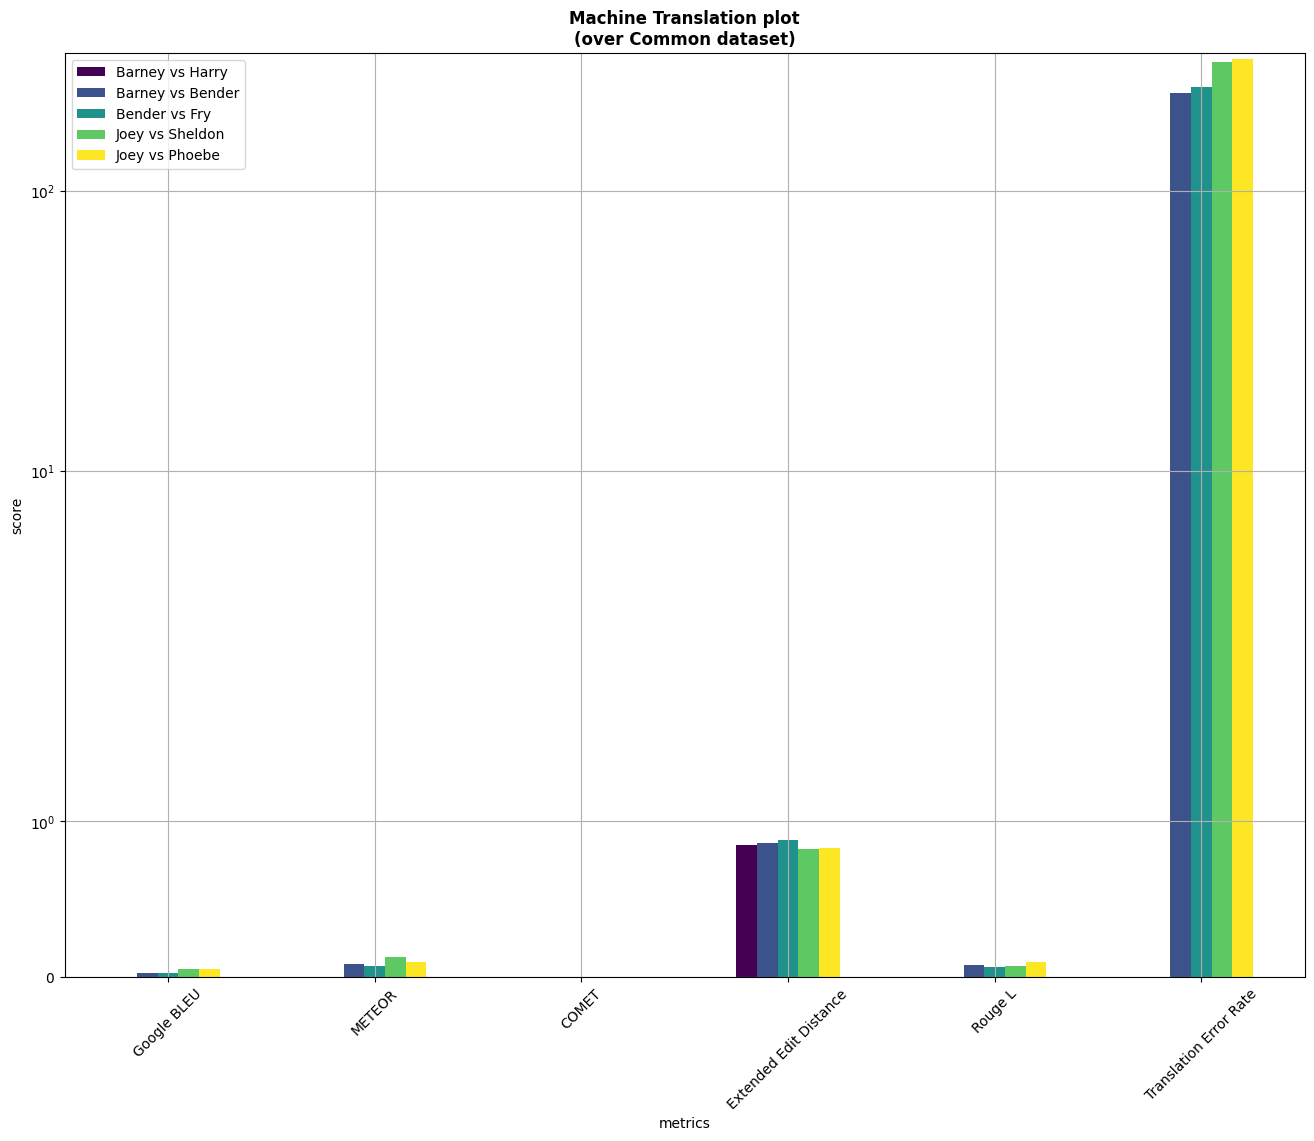

In [5]:
BBVisualization.load_visualization(PlotsEnum.MT.value, commondf=True, debug=False).plot(logscale=True)

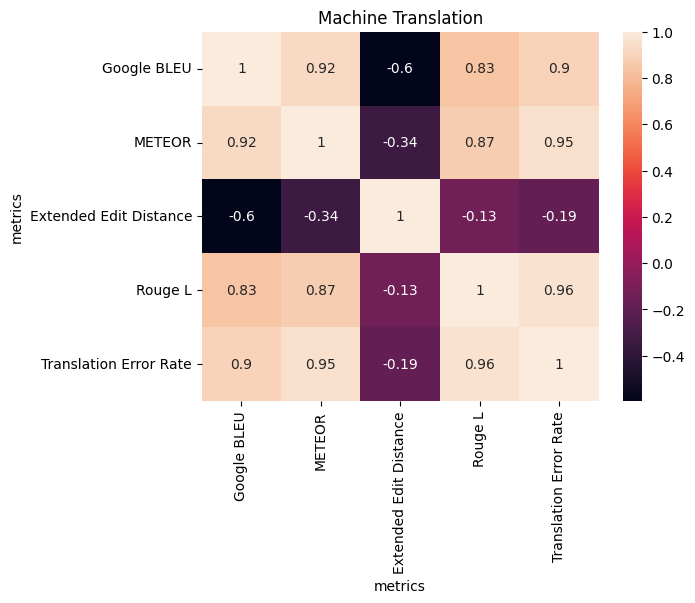

In [6]:
BBVisualization.load_visualization(PlotsEnum.MT.value, metrics=mts, commondf=True).corr(correlate='metrics', debug=False)

## Text Generation

Text Generation


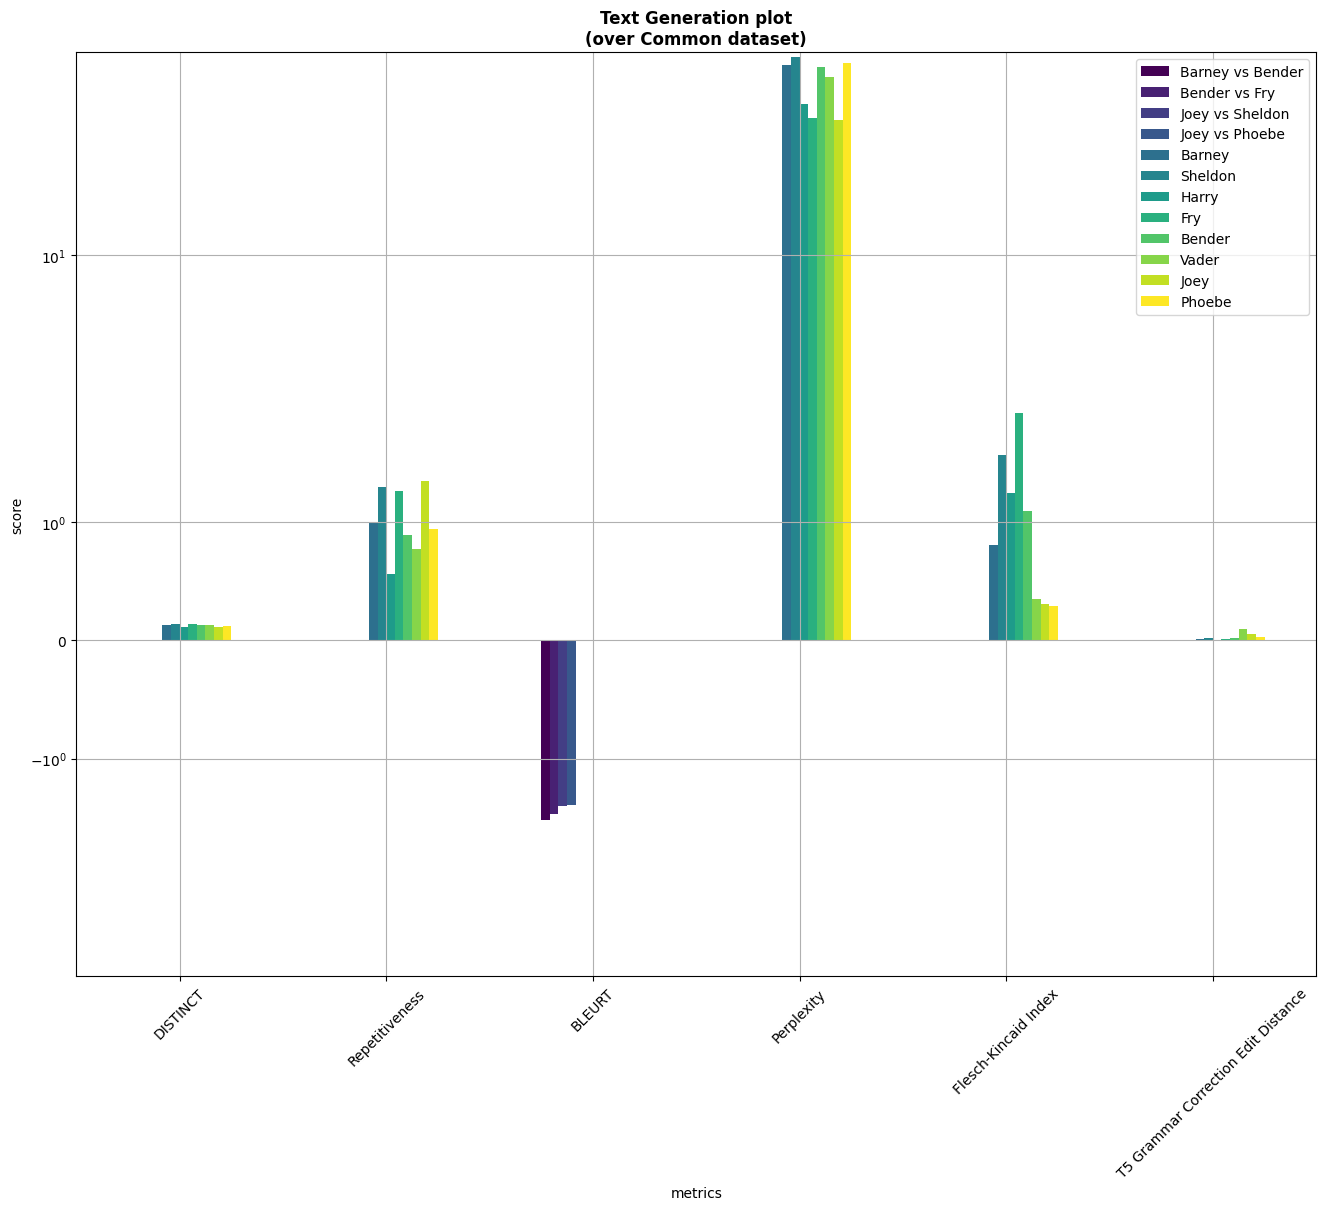

In [11]:
characters = ['Barney vs Harry', 'Barney vs Bender', 'Bender vs Fry', 'Joey vs Sheldon', 'Joey vs Phoebe']
# BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=False, debug=False, characters=characters).plot(logscale=True)
BBVisualization.load_visualization(PlotsEnum.TG.value, commondf=True, debug=False).plot(logscale=True)

Semantic Similarity


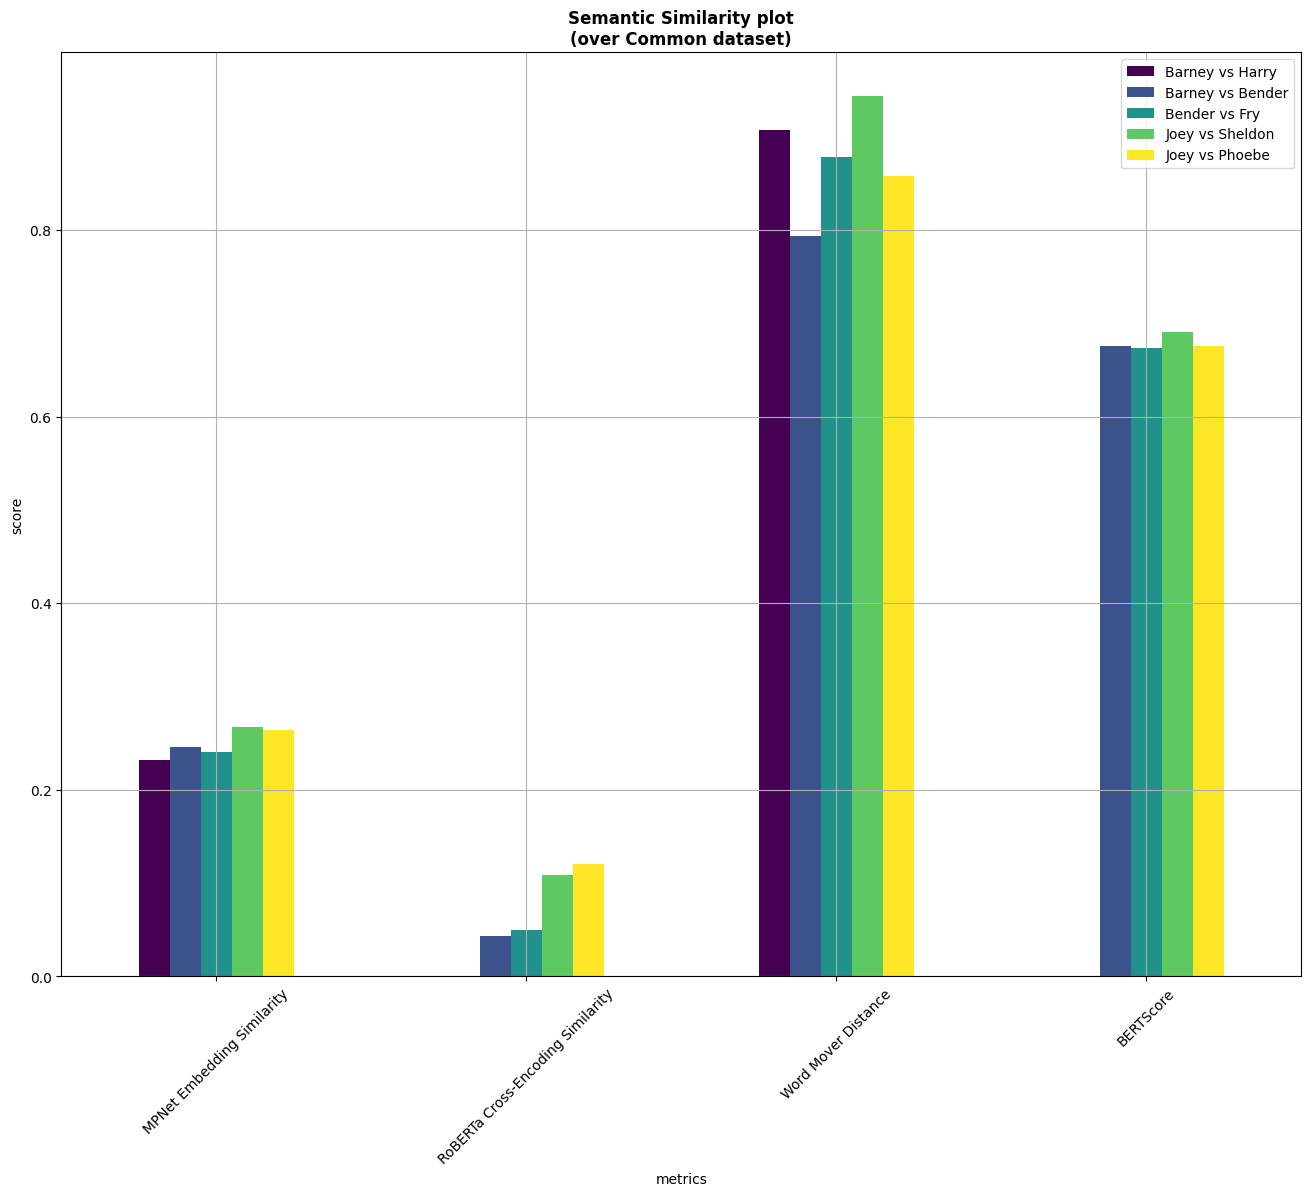

In [12]:
BBVisualization.load_visualization(PlotsEnum.SS.value, commondf=True, debug=False).plot()

Emotion Classifier Radar


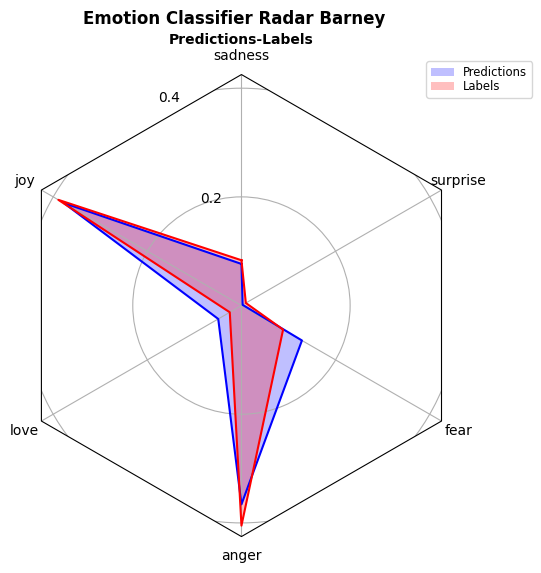

In [9]:
BBVisualization.load_visualization(PlotsEnum.ECR.value, character='Barney', debug=False).plot()

Frequency Classifier Radar


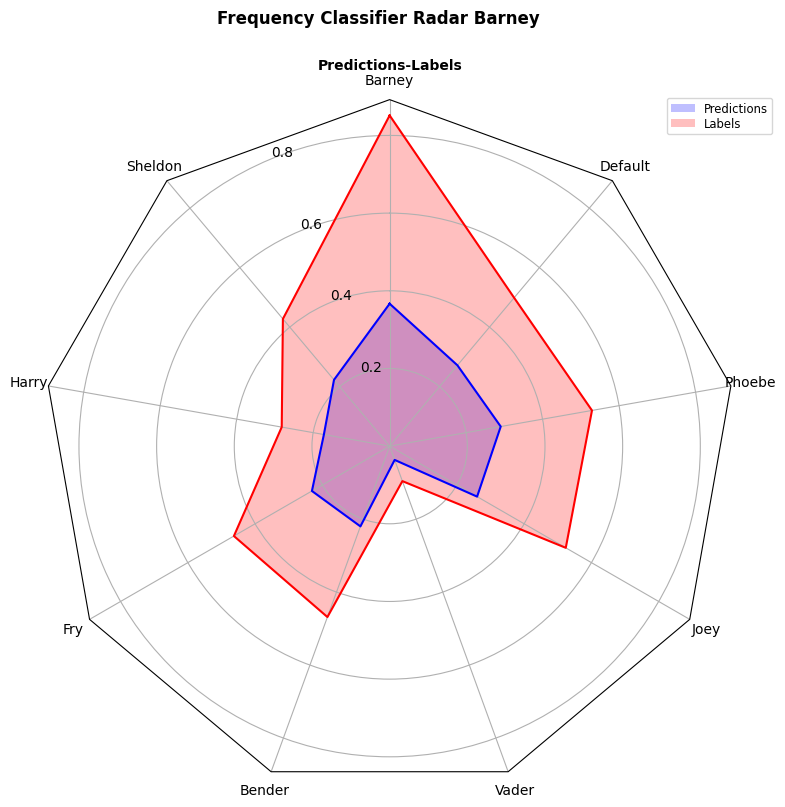

In [10]:
BBVisualization.load_visualization(PlotsEnum.FCR.value, character='Barney', debug=False).plot()
